In [5]:
!pwd

/tf/capstone2/notebooks


In [6]:
cd ..

/tf/capstone2


In [7]:
cd src/

/tf/capstone2/src


In [8]:
pwd

'/tf/capstone2/src'

In [15]:
# Model stuff
brief_mode = True  # use to take an even sub-sample for debugging; makes sure to hit all classes. 

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# flake8: noqa

#from pipeline import 
from skimage.filters import sobel 
from skimage.feature._canny import canny
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.io import imread
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.model_selection import GridSearchCV


from image_pipeline import ImagePipeline
from image_convolv import * 
from cnn import *
from bc_plotting import *
from bc import *

# Careful: outside numpy we would say this is a LxW shape
image_size = tuple((153, 234, 3))

In [16]:
ip = run_pipeline()
perform_image_transforms(ip)


first image shape (460, 700, 3)
first names entry SOB_B_A-14-22549AB-200-001.png
images_list should have list of 82 patients x images, filenames of shape 460 
first image shape (460, 700, 3)
images_filename_list should have list of 82 patients * images
first names entry SOB_B_A-14-22549AB-200-001.png
{'seq': '001', 'biopsy_procedure': 'SOB', 'slide_id': '22549AB', 'tumor_class': 'B', 'image_size': (460, 700, 3), 'year': '14', 'mag': '200', 'tumor_type': 'A'}


images_list len 82 
shape of np array converted images_list going in (82, 153, 234, 3)
features shape (82, 153, 234, 3)
attribs (dict) len 82
{'seq': '001', 'biopsy_procedure': 'SOB', 'slide_id': '13200', 'tumor_class': 'B', 'image_size': (460, 700, 3), 'year': '14', 'mag': '200', 'tumor_type': 'TA'}
{'seq': '001', 'biopsy_procedure': 'SOB', 'slide_id': '3411F', 'tumor_class': 'B', 'image_size': (460, 700, 3), 'year': '14', 'mag': '200', 'tumor_type': 'TA'}
{'seq': '001', 'biopsy_procedure': 'SOB', 'slide_id': '12312', 'tumor_class': 'M', 'image_size': (460, 700, 3), 'year': '14', 'mag': '200', 'tumor_type': 'DC'}
{'seq': '001', 'biopsy_procedure': 'SOB', 'slide_id': '10926', 'tumor_class': 'M', 'image_size': (460, 700, 3), 'year': '14', 'mag': '200', 'tumor_type': 'DC'}
{'seq': '001', 'biopsy_procedure': 'SOB', 'slide_id': '15792', 'tumor_class': 'M', 'image_size': (460, 700, 3), 'year': '14', 'mag': '200', 'tumor_type': 'DC'}
{'seq': '018', 'biopsy_procedure': 'SOB', 'slide_id': '252

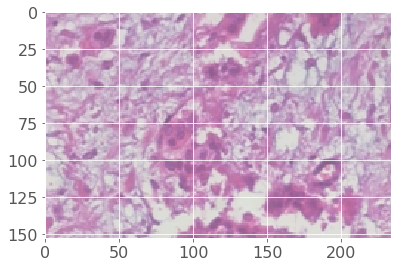

getting sample of type DC
found fn SOB_M_DC-14-12312-200-001.png at index [28]


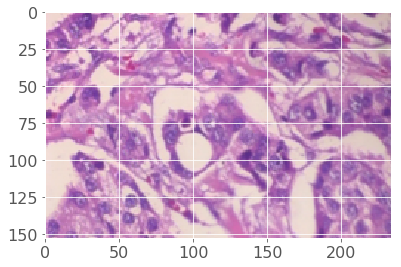

getting sample of type PC
found fn SOB_M_PC-14-19440-200-001.png at index [79]


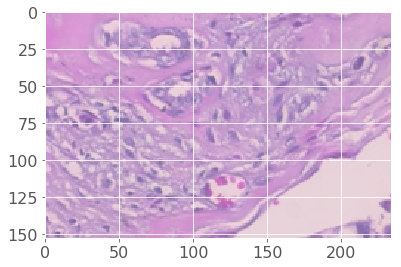

getting sample of type LC
found fn SOB_M_LC-14-13412-200-001.png at index [63]


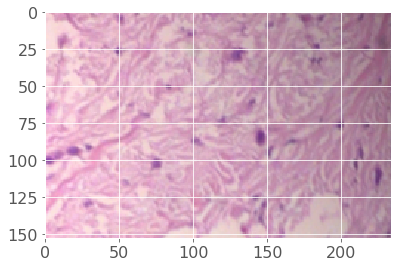

features shape: (106, 153, 234, 3) 
shapes of train test input (106, 153, 234, 3) (106,)


In [17]:
# Turns data into arrays
ip.vectorize()
ip.double_the_benigns()  # Evens out the classes

# Useful for EDA
img_dict = ip.get_one_of_each('M')
#plot_images(img_dict)

features = ip.features
target = ip.tumor_class_vector


print('features shape: {} '.format(features.shape))
print('shapes of train test input {} {}'.format(features.shape, target.shape))
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .2, random_state=1)

    

In [18]:
X_train[0]

array([[[0.6312672 , 0.45477095, 0.67047894],
        [0.78345704, 0.610794  , 0.7954868 ],
        [0.8743363 , 0.6822373 , 0.86270636],
        ...,
        [0.8812901 , 0.70096886, 0.88935924],
        [0.6501893 , 0.48164973, 0.7210036 ],
        [0.50978315, 0.38821858, 0.6313262 ]],

       [[0.6313942 , 0.42352957, 0.66667175],
        [0.6935626 , 0.47387838, 0.75229746],
        [0.7485959 , 0.536626  , 0.79188776],
        ...,
        [0.8663931 , 0.68195796, 0.86272293],
        [0.7166716 , 0.5326083 , 0.7640434 ],
        [0.5176569 , 0.39225528, 0.6235176 ]],

       [[0.6470756 , 0.435183  , 0.68619394],
        [0.6586589 , 0.42739987, 0.72523963],
        [0.65458566, 0.43896073, 0.7332903 ],
        ...,
        [0.80397713, 0.60789734, 0.8002859 ],
        [0.7794548 , 0.58351177, 0.8110779 ],
        [0.5729776 , 0.43556422, 0.6591245 ]],

       ...,

       [[0.878367  , 0.82344884, 0.8665385 ],
        [0.8824024 , 0.8197214 , 0.8744595 ],
        [0.8784314 , 0

In [19]:
image_gen_train = preprocessing.image.ImageDataGenerator(rotation_range=20, 
                                                                #featurewise_center=True,
                                                                #rescale=1./255,
                                                                #featurewise_std_normalization=True,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True, 
                                                                vertical_flip=True)

In [20]:
image_gen_train.fit (X_train[:1], augment=True)  # 1st few images

In [21]:
image_gen_train.get_random_transform(image_size)

{'brightness': None,
 'channel_shift_intensity': None,
 'flip_horizontal': 0,
 'flip_vertical': 0,
 'shear': 0,
 'theta': -7.843507786369379,
 'tx': 1.6156508869853001,
 'ty': 11.588823126006675,
 'zx': 1,
 'zy': 1}

In [22]:
datagen = image_gen_train.flow(X_train, y_train)
datagen

In [23]:
import io
img = np.array(datagen.next)
img.shape
type(datagen.next)
#io.imshow(datagen.next)

method

In [24]:
image_gen_train = preprocessing.image.ImageDataGenerator(rotation_range=20, 
                                    #featurewise_center=True,
                                    #rescale=1./255,
                                    #featurewise_std_normalization=True,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True, 
                                    vertical_flip=True,
                                    fill_mode='wrap')
# np_iter = preprocessing.image.NumpyArrayIterator(self.X_train, self.y_train, datagen)
# why both fit and flow?  fit gives you summary attrib's ex to apply ZCA Whitening
image_gen_train.fit(X_train, augment=True, rounds=5)

datagen = image_gen_train.flow(X_train, y_train)

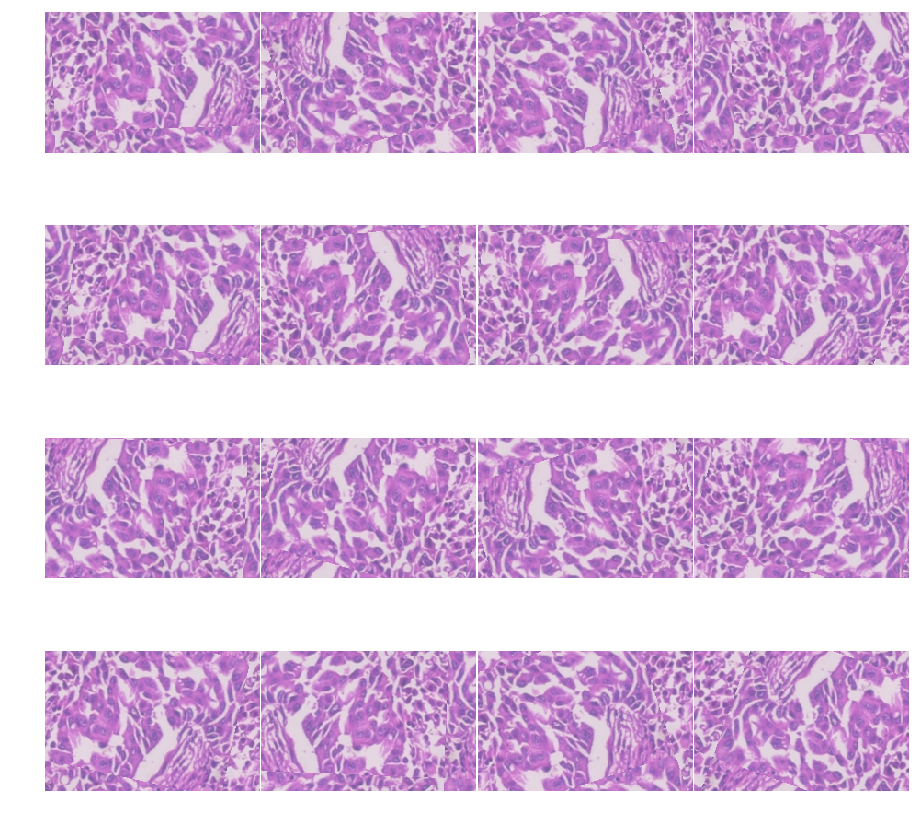

In [46]:

# iterator
start_img = X_train[:1]
aug_iter = image_gen_train.flow(start_img, batch_size=1)

# generate samples and plot
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15,15))

for i, ax in enumerate(axs.flatten()):

    # generate batch of images
    if i == 0:
        ax.imshow(X_train[0])
        ax.axis('off')
        ax.set_title='original'

    # convert to unsigned integers
    image = next(aug_iter)[0] #.astype('uint8'

    # plot image
    ax.imshow(image) # intepolation? 
    ax.axis('off')

plt.subplots_adjust (left=0.1, wspace=0.01)
    
    

In [ ]:
# This tricky bit makes one big image to show
'''
rows, cols = 10, 30
num = rows * cols
imgs = np.concatenate([x_test[:num], x_test_noisy[:num], x_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
'''